<a href="https://colab.research.google.com/github/ShinjiNeo/Test_ML/blob/main/Template_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Per il Text Minning

## Librerie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import Image, display
from PIL import Image


# !pip install spacy ## Colab har already the installer
# !python -m spacy download en
#!python -m spacy download it_core_news_sm
#!python -m spacy download it_core_news_md
#!python -m spacy download it_core_news_lg

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [ ]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/NLPes1.csv'
df = pd.read_csv(path) # possibili altri separatori (sep=',' sep=';'  sep='\t')
df[0]

KeyError: 0

## Sezione di pulizia con Regex

https://regex101.com/ per testare le regex

In [ ]:
words_to_remove = ['gargamella', 'doggy', 'word3']
words_pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'

patterns = {
            r"[a-zA-Z]+n\'t": 'not', # cerca tutti i doesn't con not as esempio
            r'\s+': ' ',             # sostituisce gli spazi doppi con un solo spazio
            r'\d+': '',              # Rimuove i numeri
            r'[^\w\s]': '',          # Rimuove simboli e punteggiatura
            r'\b\w{1,2}\b': '',      # Rimuove i token con 2 o meno caratteri ma non 2 numeri ad esempio
            r'(http|www)[^\s]+': '', # Rimuove gli indirizzi web compresi di dominimi di secondo livello
            words_pattern: ''        # Remove specific words
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)
    df[column] = df[column].str.lower() # Apply lowercase transformation
    return df

#solo in preview
clean_column(df, 'text', patterns)

,text,class
0,binsane but inspired musical about alferd pa...,1
1,bwritten david schow and john shirley base...,0
2,bmiramax disinvited online media from press ...,0
3,bin the astronauts wife charlize theron pla...,0
4,bone the most unwelcome thriller trends retu...,0
...,...,...
408,bhav plenty are told the beginning and rem...,0
409,bbrian palmas snake eyes stars nicolas cages ...,0
410,bcontact theres moment late robert zemeck...,1
411,bthis film that was inclined like the out...,0


In [ ]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,binsane but inspired musical about alferd pack...,1
1,bwritten david schow and john shirley based th...,0
2,bmiramax disinvited online media from press sc...,0
3,bin the astronauts wife charlize theron plays ...,0
4,bone the most unwelcome thriller trends return...,0
...,...,...
408,bhav plenty are told the beginning and reminde...,0
409,bbrian palmas snake eyes stars nicolas cages e...,0
410,bcontact theres moment late robert zemeckiss c...,1
411,bthis film that was inclined like the outset t...,0


In [ ]:
df['text'][0]

'binsane but inspired musical about alferd packer the first man ever tried for cannibalism america nas the story unfolds learn what events led packer trey parker supposedly killing and eating the five men who got lost while accompanying him through the mountains colorado search gold nthroughout packer must contend with evil trappers bent stealing his prized horse tribe ute indians that doesnt seem quite the mark and terrible winter storm that leads the eventual cannibalism nparker obviously knows his musicals very well because the viewer also treated some the most maddeningly catchy songs appear film would accomplish this again his postcannibal nmusical motion picture south park bigger longer and uncut napart from the inherent interest seeing pre south park parker and stone their first effort cannibal nalso offers some pretty decent laughs nthe aforementioned ute indian tribe that packers group encounters definite highlight are two rousing musical numbers about snowmen one which ends c

## Elaborazione DF

- trasformazione della colonna text in lista e poi stringa perché la wordcloud lavora solo su stringa

In [ ]:
text = list(map(str, df['text'])) # trasforma tutte le righe in stringhe e le mette in una lista
text = ''.join(text) # concatena ogni stringa



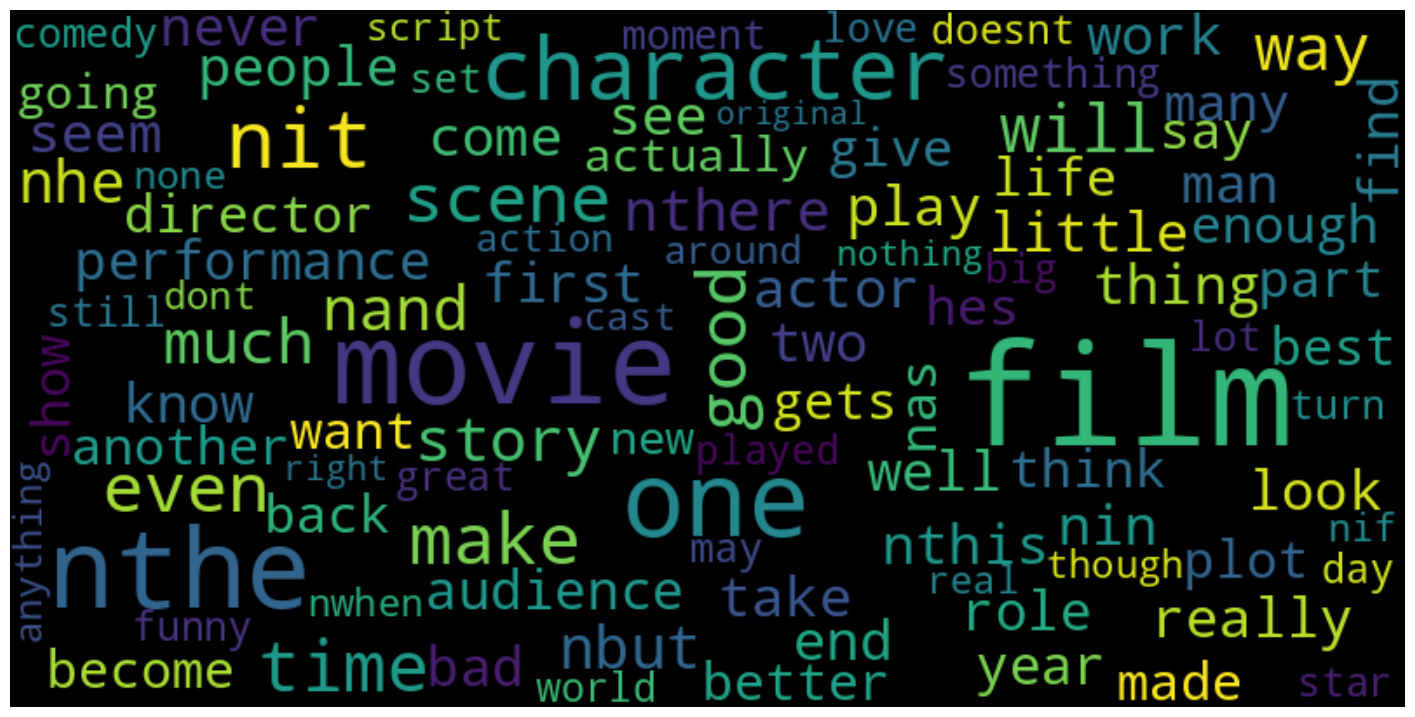

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 100, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off");

In [ ]:
df.isnull().sum()

,0
text,0
class,0


In [ ]:
df.dropna()

,text,class
0,binsane but inspired musical about alferd pack...,1
1,bwritten david schow and john shirley based th...,0
2,bmiramax disinvited online media from press sc...,0
3,bin the astronauts wife charlize theron plays ...,0
4,bone the most unwelcome thriller trends return...,0
...,...,...
408,bhav plenty are told the beginning and reminde...,0
409,bbrian palmas snake eyes stars nicolas cages e...,0
410,bcontact theres moment late robert zemeckiss c...,1
411,bthis film that was inclined like the outset t...,0


## Parte di Machine Learning


- divisione Features e Target

In [ ]:
X = df['text']
y = df['class']

## Vettorizzazione


In [ ]:
##STEP 4: Vettorizzazione - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=150000, min_df=5, max_df=0.7,stop_words="english") #solo se errore memoria
X_vect = vectorizer.fit_transform(X).toarray() # ottimizza la matrice sparsa in una più contenuta con toarray
X_vect

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_vect.shape

(413, 4063)

## TF-IDF

In [ ]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.0470105 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06120711, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_tfidf.shape

(413, 4063)

## Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    stratify=y
                                                    )

## Modellazione

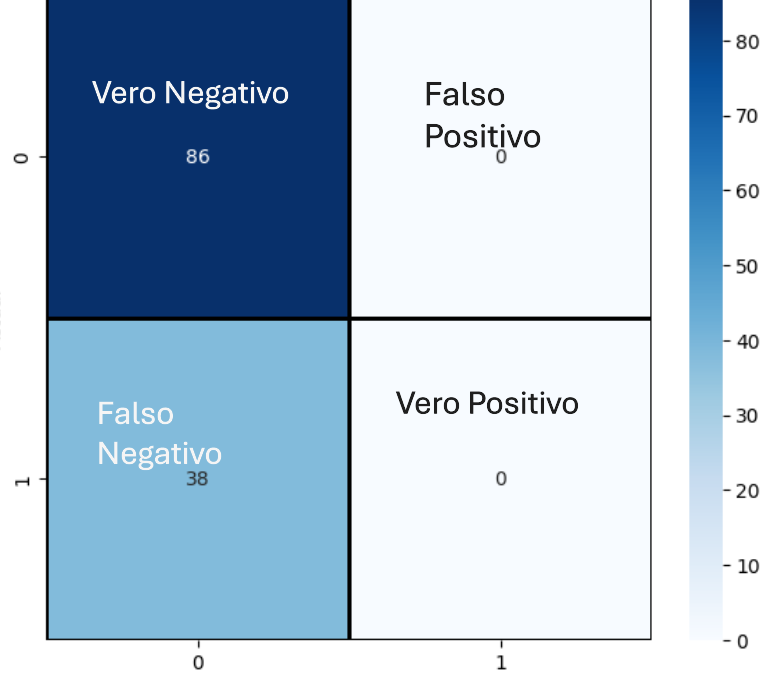

In [ ]:
from PIL import Image
from IPython.display import display
image = Image.open("/content/drive/MyDrive/Machine_Learning/Template_Esame_MLearning/TEXT_MINNING/Confusion_matrix.png")
display(image)

### Test su altri tipi di classificatori

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier


In [ ]:
classifiers = [SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None),
               GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
               LogisticRegression(max_iter=1000),
               MultinomialNB(alpha=0.1),
               KNeighborsClassifier(n_neighbors=3),
               SVC(probability=True,kernel='linear', C=1.0),
               XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
               ]

In [ ]:
for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

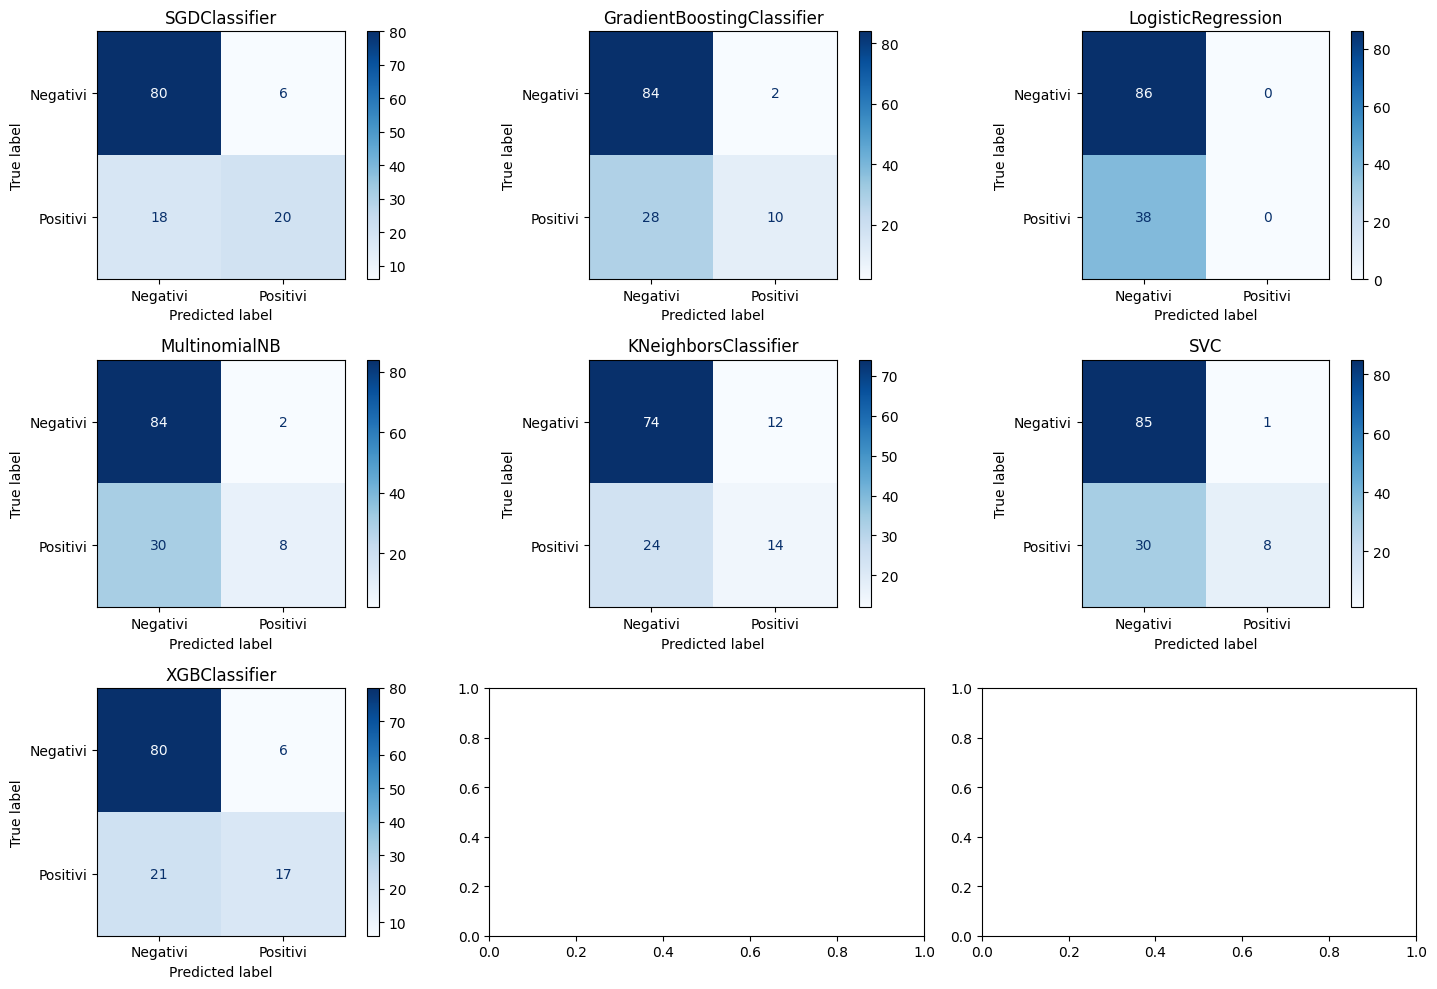

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

labels = ['Negativi','Positivi']
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            display_labels=labels,
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
#plt.show()

In [ ]:
from sklearn.metrics import classification_report

for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test),target_names=labels))

SGDClassifier(alpha=0.001, max_iter=5, random_state=667, tol=None)
              precision    recall  f1-score   support

    Negativi       0.82      0.93      0.87        86
    Positivi       0.77      0.53      0.62        38

    accuracy                           0.81       124
   macro avg       0.79      0.73      0.75       124
weighted avg       0.80      0.81      0.79       124

GradientBoostingClassifier()
              precision    recall  f1-score   support

    Negativi       0.75      0.98      0.85        86
    Positivi       0.83      0.26      0.40        38

    accuracy                           0.76       124
   macro avg       0.79      0.62      0.62       124
weighted avg       0.78      0.76      0.71       124

LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

    Negativi       0.69      1.00      0.82        86
    Positivi       0.00      0.00      0.00        38

    accuracy                           0.69       12

- Non funziona


---



AttributeError: This 'SGDClassifier' has no attribute 'predict_proba'

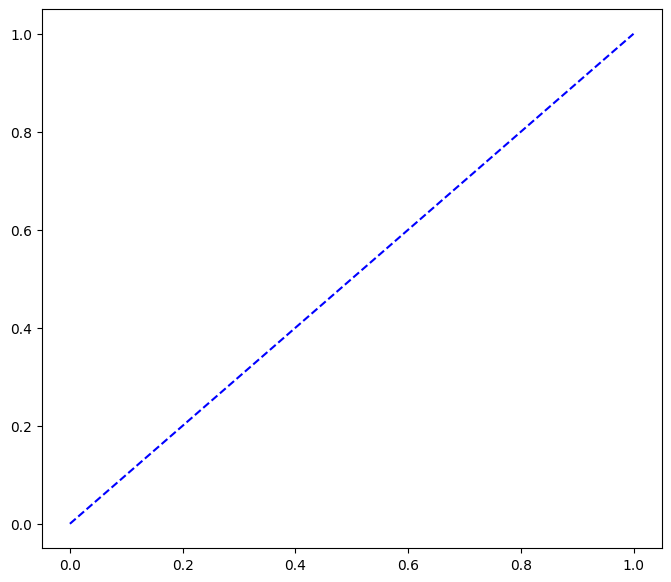

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# Train the models and record the results
plt.figure(figsize=(8,7))
ax = plt.gca()
plt.plot([0,1],[0,1],'--b')

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_score =model.predict_proba(X_test)[:, 1]
    auc_model = roc_auc_score(y_test,y_score)

    RocCurveDisplay.from_estimator(model, X_test, y_test, label=f'{cls.__class__.__name__} (AUC = {auc_model:.2f})', ax=ax)
    plt.title("Receiver Operating Characteristic (ROC) curves")
    plt.legend(loc=4)



---



- ***Aggiungere ROC CURVE***

- ***Aggiungere BEST FIT***



---

***Questi sono quelli utilizzati dal PRof***

In [ ]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train)

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy



0.6935483870967742

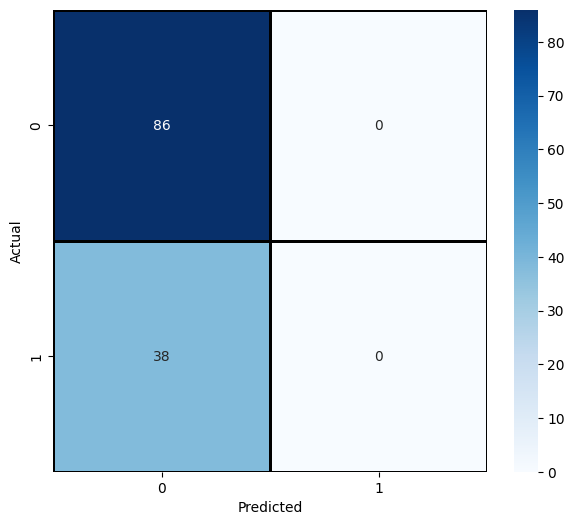

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,6))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            xticklabels = classifier.classes_,
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual");

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.7419354838709677

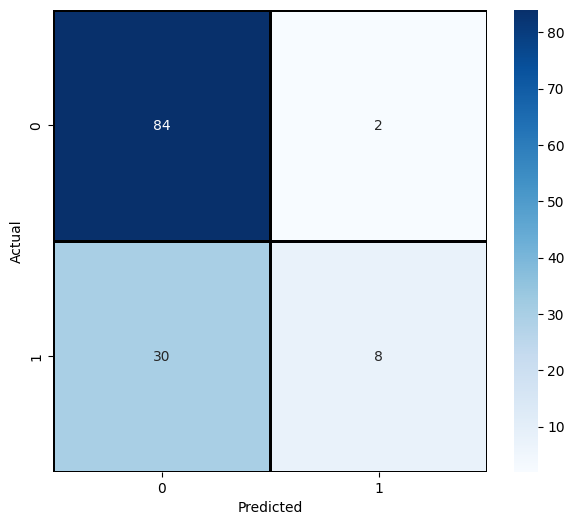

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,6))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            xticklabels = classifier.classes_,
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual");

In [ ]:
#labels = ['Class0', 'Class1']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84        86
           1       0.80      0.21      0.33        38

    accuracy                           0.74       124
   macro avg       0.77      0.59      0.59       124
weighted avg       0.76      0.74      0.68       124



In [ ]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.8064516129032258

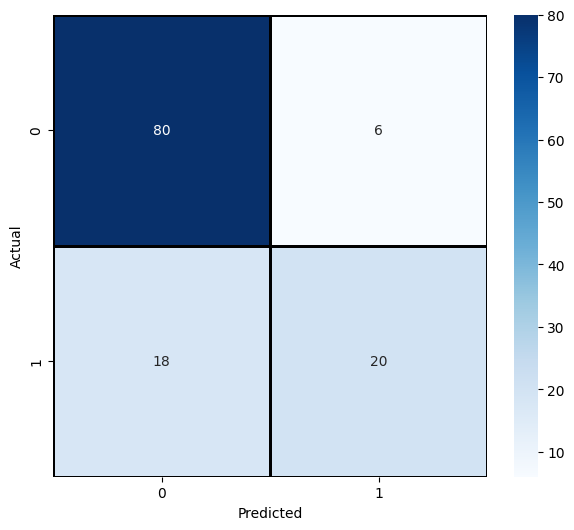

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,6))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            xticklabels = classifier.classes_,
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual");



---




## Faccio la Pipeline sul testo

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, patterns):
        self.patterns = patterns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = pd.DataFrame(X, columns=['text'])
        df = clean_column(df, 'text', self.patterns)
        return df['text'].values

- Splitto le variabili in questo caso testuali

In [ ]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    stratify=y
                                                    )



- Creo la Pipeline e vedo l'accuratezza del modello

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


text_cleaner = TextCleaner(patterns)
bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words='english')
tfidf = TfidfTransformer()
classifier =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('text cleaner', text_cleaner),
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',classifier),
                ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.782258064516129


In [ ]:
#labels = ['Class0', 'Class1']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))


              precision    recall  f1-score   support

           0       0.79      0.93      0.86        86
           1       0.74      0.45      0.56        38

    accuracy                           0.78       124
   macro avg       0.77      0.69      0.71       124
weighted avg       0.78      0.78      0.76       124



- Rifaccio la confusion Matrix

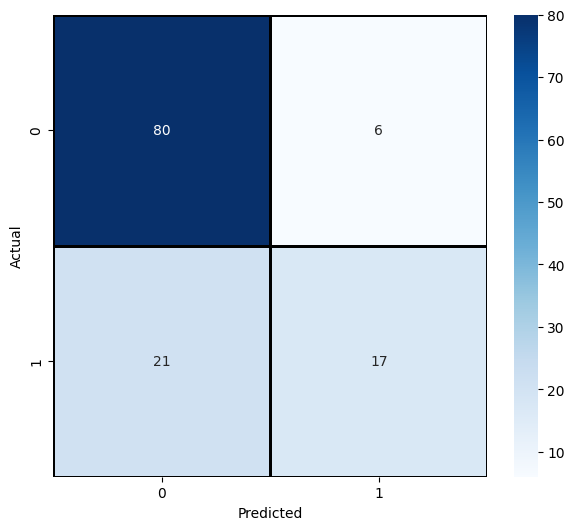

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,6))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            xticklabels = classifier.classes_,
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual");


- Cross Validation

In [ ]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.75       0.76923077 0.82692308 0.78846154 0.82692308 0.78431373
 0.78431373 0.74509804]
mean=0.7844079939668175
std=0.02870331926725185


## Importo ed esporto il modello

In [ ]:
import joblib
joblib.dump(pipe,'Class_Text_Mining.pkl')

['Class_Text_Mining.pkl']

In [ ]:
uploaded_model = joblib.load('Class_Text_Mining.pkl')
pred = uploaded_model.predict([""]) # 1 -->
pred[0]


np.int64(0)

In [ ]:
df['text'][0]

'b\'insane ( but inspired ) musical about alferd packer , the first man ever tried for cannibalism in america . \\nas the story unfolds we learn what events led to packer ( trey parker ) supposedly killing and eating the five men who got lost while accompanying him through the mountains of colorado in search of gold . \\nthroughout , packer must contend with evil trappers bent on stealing his prized horse , a tribe of `ute\\\' indians that doesn\\\'t seem quite on the mark , and a terrible winter storm that leads to the eventual cannibalism . \\nparker obviously knows his musicals very well , because the viewer is also treated to some of the most maddeningly catchy songs to appear in a film ( he would accomplish this again in his post-cannibal ! \\nmusical motion picture , south park : bigger , longer , and uncut ) . \\napart from the inherent interest of seeing a pre- " south park " parker and stone in their first effort , cannibal ! \\nalso offers up some pretty decent laughs . \\nth

In [ ]:
df.iloc[:1,:1]

,text
0,b'insane ( but inspired ) musical about alferd...
